#  Restricted Boltzmann Machines (RBMs) and Deep Belief Networks (DBNs) from scratch for representation learning on the MNIST dataset.

All of the code has been written based on "A Practical Guide to Training Restricted Boltzmann Machines" by Geoffrey Hinton and "A fast learning algorithm for deep belief nets" by Geoffrey Hinton et al. Both of the papers can be found at literature/.

The documentation of the code generated by Sphinx is located docs/. cd to docs/ then make html, then open index.html at docs/_build/html with your fav browser.

Some of the code is credited to the TAs and lecturers of DD2437 Artificial Neural Networks and Deep Architectures, who delivered an amazing set of lectures and laboratories. Thanks for all, it was really educational! The code was part of a laboratory, the description of which (with much of the theoretical background) is located at literature/.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet

## RBMs for representation learning on the MNIST hand-written digits dataset

Train an RBM on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 400
learning CD1
iteration=      1 Reconstruction loss=24.9324
iteration=      2 Reconstruction loss=23.2586
iteration=      3 Reconstruction loss=22.8601
iteration=      4 Reconstruction loss=22.6377
iteration=      5 Reconstruction loss=22.4318
iteration=      6 Reconstruction loss=22.3228
iteration=      7 Reconstruction loss=22.1392
iteration=      8 Reconstruction loss=22.0605
iteration=      9 Reconstruction loss=21.9777
iteration=     10 Reconstruction loss=21.9028
iteration=     11 Reconstruction loss=21.8322
iteration=     12 Reconstruction loss=21.8096
iteration=     13 Reconstruction loss=21.7530
iteration=     14 Reconstruction loss=21.6990
iteration=     15 Reconstruction loss=21.6490
iteration=     16 Reconstruction loss=21.6213
iteration=     17 Reconstruction loss=21.5867
iteration=     18 Reconstruction loss=21.5520
iteration=     19 Reconstruction loss=21.5305
iteration=     20 Reconstruction loss=21.5038
iter

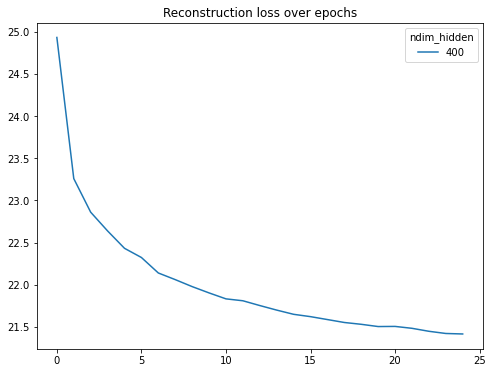

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)"""

epochs = 25
hidden = 400
print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")


rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

loss_history = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    
plt.figure(figsize=(8,6))
plt.plot(range(epochs), loss_history, label=hidden)

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_{hidden}.png')
plt.show()

Train several RBMs with different number of hidden layers on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs for each hidden layer dimension.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 200
learning CD1
iteration=      1 Reconstruction loss=25.8290
iteration=      2 Reconstruction loss=23.6577
iteration=      3 Reconstruction loss=23.1777
iteration=      4 Reconstruction loss=22.8741
iteration=      5 Reconstruction loss=22.7162
iteration=      6 Reconstruction loss=22.5794
iteration=      7 Reconstruction loss=22.4582
iteration=      8 Reconstruction loss=22.3750
iteration=      9 Reconstruction loss=22.2978
iteration=     10 Reconstruction loss=22.2551
iteration=     11 Reconstruction loss=22.2404
iteration=     12 Reconstruction loss=22.2049
iteration=     13 Reconstruction loss=22.1414
iteration=     14 Reconstruction loss=22.1342
iteration=     15 Reconstruction loss=22.0884
iteration=     16 Reconstruction loss=22.0625
iteration=     17 Reconstruction loss=22.0573
iteration=     18 Reconstruction loss=22.0338
iteration=     19 Reconstruction loss=22.0082
iteration=     20 Reconstruction loss=22.0068
iter

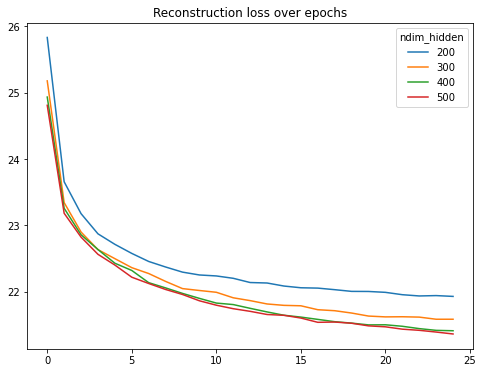

In [3]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""


hidden_dims = [200, 300, 400, 500]
epochs = 25
loss_history = np.zeros((len(hidden_dims), epochs))
i = 0

for hidden in hidden_dims:
    print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")
    rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

    loss_history[i] = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    i += 1

plt.figure(figsize=(8,6))

for plots in range(len(hidden_dims)):
    plt.plot(range(epochs), loss_history[plots], label=hidden_dims[plots])

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_compare.png')
plt.show()

## DBNs for representation learning on the MNIST hand-written digits dataset

### DBN training

Train the DBN (from the Hinton paper) on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration and greedy layer-wise training, and observe the reconstruction losses per layer per epoch over the process.

Also, save the trained weigths of the layers at trained_rbm/, so they can be loaded (for recognition and generation).

In [4]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""np.random.seed(100)
indices = np.random.choice(train_imgs.shape[0], 10, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10)

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=100)


Starting a Deep Belief Net..
training vis--hid
learning CD1
iteration=      1 Reconstruction loss=20.1148
iteration=      2 Reconstruction loss=18.9031
iteration=      3 Reconstruction loss=18.6161
iteration=      4 Reconstruction loss=18.4116
iteration=      5 Reconstruction loss=18.2683
iteration=      6 Reconstruction loss=18.1454
iteration=      7 Reconstruction loss=18.0565
iteration=      8 Reconstruction loss=17.9481
iteration=      9 Reconstruction loss=17.8940
iteration=     10 Reconstruction loss=17.8566
iteration=     11 Reconstruction loss=17.7871
iteration=     12 Reconstruction loss=17.7426
iteration=     13 Reconstruction loss=17.6795
iteration=     14 Reconstruction loss=17.6801
iteration=     15 Reconstruction loss=17.6331
iteration=     16 Reconstruction loss=17.6026
iteration=     17 Reconstruction loss=17.5757
iteration=     18 Reconstruction loss=17.5656
iteration=     19 Reconstruction loss=17.5388
iteration=     20 Reconstruction loss=17.5188
iteration=     21 R

iteration=     79 Reconstruction loss=8.6337
iteration=     80 Reconstruction loss=8.6245
iteration=     81 Reconstruction loss=8.6089
iteration=     82 Reconstruction loss=8.6056
iteration=     83 Reconstruction loss=8.5517
iteration=     84 Reconstruction loss=8.5994
iteration=     85 Reconstruction loss=8.6121
iteration=     86 Reconstruction loss=8.5891
iteration=     87 Reconstruction loss=8.5953
iteration=     88 Reconstruction loss=8.5738
iteration=     89 Reconstruction loss=8.5819
iteration=     90 Reconstruction loss=8.5807
iteration=     91 Reconstruction loss=8.5774
iteration=     92 Reconstruction loss=8.5683
iteration=     93 Reconstruction loss=8.5396
iteration=     94 Reconstruction loss=8.5353
iteration=     95 Reconstruction loss=8.5276
iteration=     96 Reconstruction loss=8.5145
iteration=     97 Reconstruction loss=8.5378
iteration=     98 Reconstruction loss=8.5452
iteration=     99 Reconstruction loss=8.5239
iteration=    100 Reconstruction loss=8.5465
training p

### DBN as discriminative model

DBN as a recognition model. Check accuracy of recognition on the training and the test datasets.

In [5]:
print("Accuracy on training dataset is:")
dbn.recognize(train_imgs, train_lbls)

print("\nAccuracy on test dataset is:")
dbn.recognize(test_imgs, test_lbls)

Accuracy on training dataset is:
accuracy = 88.89%

Accuracy on test dataset is:
accuracy = 88.93%


### DBN as generative model

DBN as a generative model. Generate images from the learned posterior by labels.

Generation is done via alternating Gibbs sampling for k iterations (check dbn.py). There will be this many images generated. The generated images are stiched together and animated, and saved at dbn_mp4/.

Generating images by label with DBN...

Generated for label 0
Generated for label 1
Generated for label 2
Generated for label 3
Generated for label 4
Generated for label 5
Generated for label 6
Generated for label 7
Generated for label 8
Generated for label 9


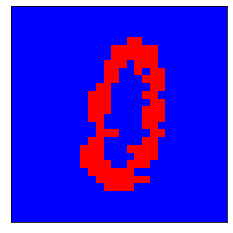

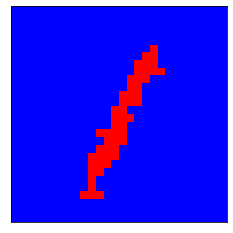

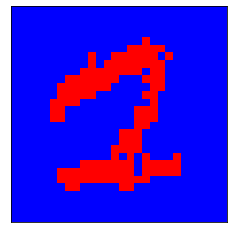

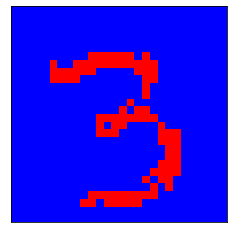

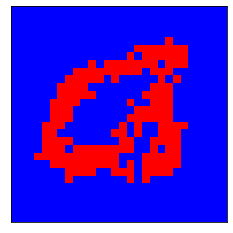

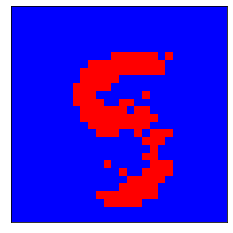

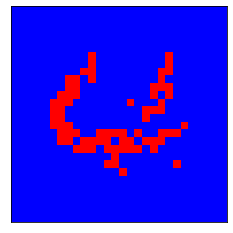

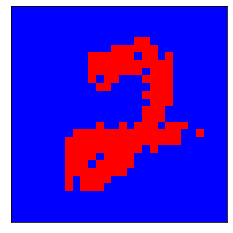

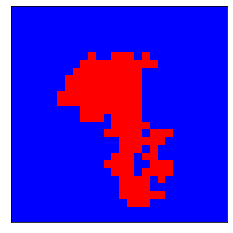

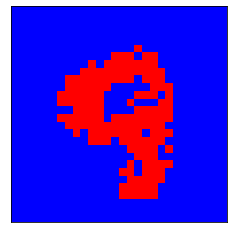

In [6]:
print("Generating images by label with DBN...\n")

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    print(f"Generated for label {digit}")
    dbn.generate(digit_1hot, name="rbms")

## TODO
1. Supervised fine-tuning of recognition weights of DBN with the wake-sleep algorithm
2. Momentum parameter update in RBM for more robust gradient-based optimization